### Hints to Set up Project #2 Problems

In [2]:
import numpy as np
from PIL import Image
from IPython.display import display
#from pint import UnitRegistry
#ureg = UnitRegistry()

## Problem #2
Determine the resultant force at pins A, B, and C on the three-member frame.

You must update the code to introduce a function that allows the user to change the following inputs to the problem:
- The magnitude of the distributed load acting on member AC
- The magnitude of the point load acting on member BC
- The angle of member AC relative to the x axis (assume it remains pinned at C and its length is changeable - i.e., pin A may move). You may assume the angle lies between 1 and 90 degrees.
- The height and width of member BC. You may assume the dimensions of member BC are not permitted to be smaller than their given values.


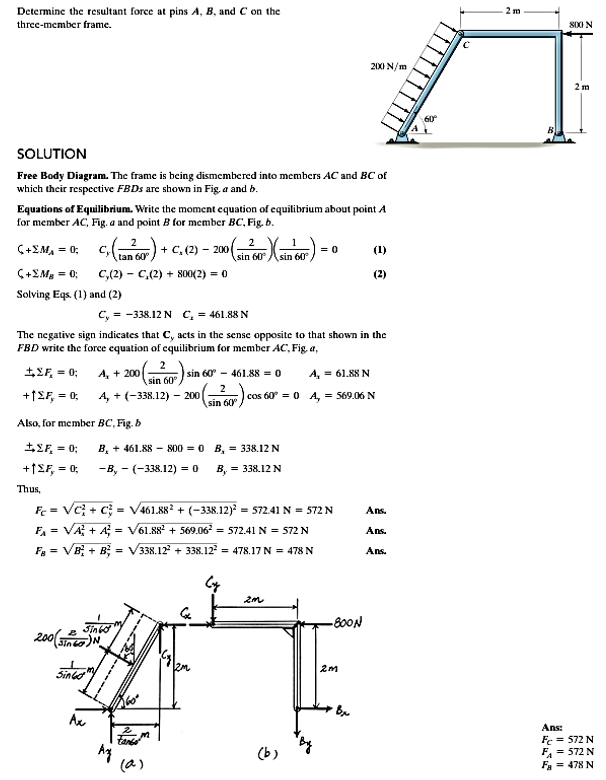

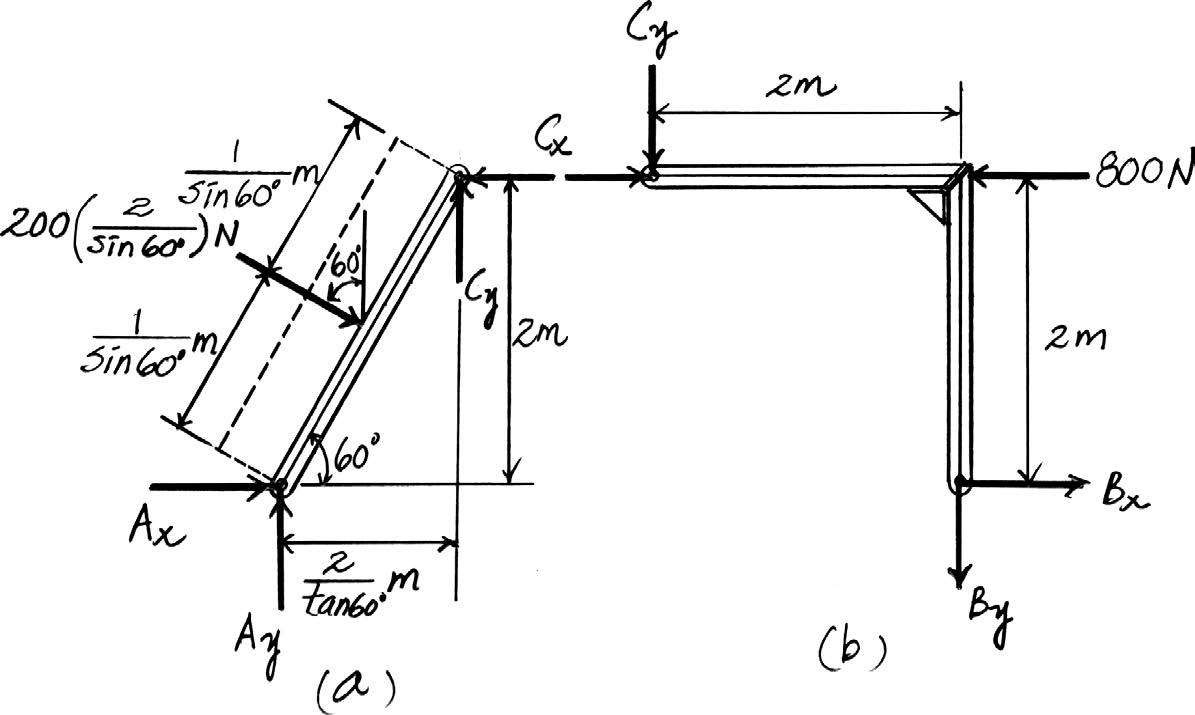

In [4]:
from PIL import Image
from IPython.display import display
prob2 = Image.open('Problem #2 Solutions.png')
prob2_fbd = Image.open('FBD Problem #2.png')
display(prob2)
display(prob2_fbd)

### Set Up Inputs

# forces acting on members
import math

def frame(theta= 60, x_BC= 2, y_BC= 2):
    L_AC = 2 * np.tan(theta)
    F_AC = 200 * (L_AC)
    F_ACx= F_AC * (2/np.cos(60))
    F_ACy= F_AC * np.sin(60)
    F_BC = 800

    x_BC = x_BC * ureg.meter
    y_BC = y_BC * ureg.meter
    theta = 60 * ureg.degree
    return theta, x_BC, y_BC

print ('The force magnitude F_BC is {0: .2f}.'.format(F_BC))
print ('The force magnitude F_AC is {0: .2f}.'.format(F_AC))
print ('The force magnitude F_ACx is {0: .2f}.'.format(F_ACx))
print ('The force magnitude F_ACy is {0: .2f}.'.format(F_ACy))

# ERROR
### forces acting on members
import math
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

def frame(theta=60, x_BC=2, y_BC=2):
    L_AC = 2 * np.tan(np.radians(theta))
    F_AC = 200 * (L_AC)
    F_ACx = F_AC * (2/np.cos(np.radians(60)))
    F_ACy = F_AC * np.sin(np.radians(60))
    F_BC = 800

    x_BC = x_BC * ureg.meter
    y_BC = y_BC * ureg.meter
    theta = 60 * ureg.degree
    
    # Return all the forces along with other parameters
    return theta, x_BC, y_BC, F_BC, F_AC, F_ACx, F_ACy

### Call the function and unpack the returned values
theta, x_BC, y_BC, F_BC, F_AC, F_ACx, F_ACy = frame()

### Now we can print the forces
print('The force magnitude F_BC is {0:.2f}'.format(F_BC))
print('The force magnitude F_AC is {0:.2f}'.format(F_AC))
print('The force magnitude F_ACx is {0:.2f}'.format(F_ACx))
print('The force magnitude F_ACy is {0:.2f}'.format(F_ACy))

In [8]:
# forces acting on members
import math
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

F_ACdl=200
F_BC=800
theta=60
L_BCx=2
L_BCy=2

In [9]:

def frame(F_ACdl, F_BC, theta, L_BCx, L_BCy):
    theta = theta * (math.pi / 180)
    L_AC = L_BCy / np.sin(theta)
    F_AC = F_ACdl * L_AC
    F_Cx = (F_BC * (L_BCy / np.tan(theta)) + F_AC * (L_AC/2))/(L_BCx +(L_BCy / np.tan(theta)))
    F_Cy = F_Cx - F_BC
    F_By = -F_Cy
    F_Bx= F_BC - F_Cx
    F_Ax= F_Cx - F_AC * np.sin(theta)
    F_Ay= -F_Cy + F_AC * np.cos(theta)
    F_A= math.sqrt(F_Ax**2 + F_Ay**2) * ureg.newton
    F_B= math.sqrt(F_Bx**2 + F_By**2) * ureg.newton
    F_C= math.sqrt(F_Cx**2 + F_Cy**2) * ureg.newton
 
    
    
    # Return all the forces along with other parameters
    return F_A, F_B, F_C

# Call the function and unpack the returned values
F_A, F_B, F_C=frame(F_ACdl, F_BC, theta, L_BCx, L_BCy)

# Now we can print the forces
print('The force magnitude F_A is {0:.2f}'.format(F_A))
print('The force magnitude F_B is {0:.2f}'.format(F_B))
print('The force magnitude F_C is {0:.2f}'.format(F_C))


The force magnitude F_A is 572.41 newton
The force magnitude F_B is 478.17 newton
The force magnitude F_C is 572.41 newton


# ERROR

### the .magnitude attribute will give you a number only
### You can solve for forces using the function: np.linalg.solve()

test_theta = 60*ureg.degree

CYa=(2/np.tan(test_theta))

Ca_forces= np.array([[CYa, 2],
                    [2,-2]])
Cb_forces= np.array([(-200*(2/np.sin(60))*(1/np.sin(60))), 1600])

forces= np.linalg.solve(Ca_forces, Cb_forces)

R_A, R_B = forces
print(f"Reaction force at A: {R_A:.2f} N")
print(f"Reaction force at B: {R_B:.2f} N")



print(Ca_forces)
print(Cb_forces)


## Problem #3
Determine the magnitude and coordinate direction angles
of the resultant force of the two forces acting on the sign at
point A. You **must** specify the constraints on your solution in terms of locations and directions for the two forces $F_C$ and $F_B$. Your solution **must** use functions to allow the user to change the following inputs:
- Distance to point A
- Magnitudes of $F_C$ and $F_B$
- y and z displacements from their respective axes for each cable connected to the wall at points B and C. You may assume these displacements must be greater than one meter in each direction.

You may assume that forces $F_C$ and $F_B$ must act in the given quadrants - i.e., to the upper left and right of the sign, respectively.


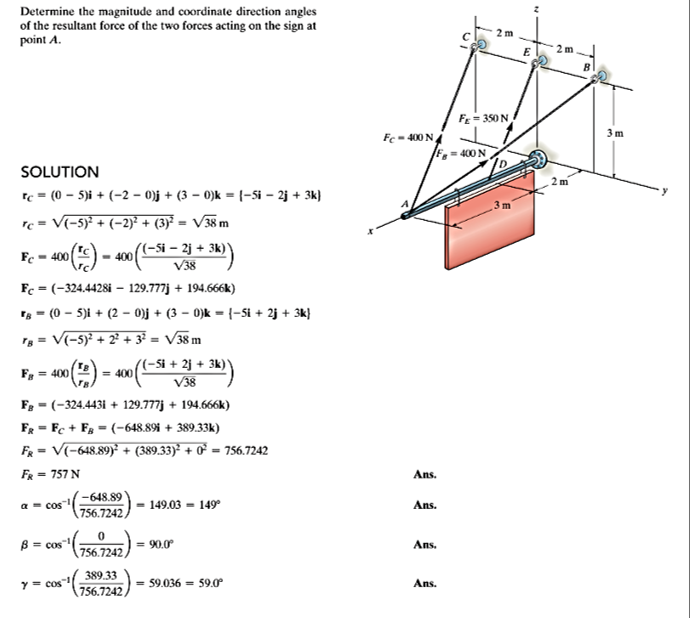

In [12]:
prob3 = Image.open('Problem #3 Solutions.png')
display(prob3)

### Set Up Inputs

### Solve problem

In [15]:
# Points
A_coords = np.array([ 5,  0, 0]) * ureg.meter
B_coords = np.array([ 0,  2, 3]) * ureg.meter
C_coords = np.array([ 0, -2, 3]) * ureg.meter
D_coords = np.array([ 2,  0, 0]) * ureg.meter
E_coords = np.array([ 0,  0, 3]) * ureg.meter

# Forces
F_B_mag = 400 * ureg.newton
F_C_mag = 400 * ureg.newton
F_E_mag = 350 * ureg.newton

# Unit vector function
def unit_vector(vec):
    mag = np.sqrt(np.dot(vec, vec))
    return vec / mag if mag != 0 else np.zeros_like(vec)

# Position vectors for cables
r_AB = B_coords - A_coords
r_AC = C_coords - A_coords

# Unit direction vectors
u_AB = unit_vector(r_AB.magnitude)
u_AC = unit_vector(r_AC.magnitude)

# Force vectors
F_B_vec = F_B_mag.magnitude * u_AB
F_C_vec = F_C_mag.magnitude * u_AC

# Sum the forces at A
F_res = F_B_vec + F_C_vec
F_res_qty = F_res * ureg.newton
F_res_mag = np.sqrt(np.dot(F_res,F_res)) * ureg.newton

# Coordinate direction angles (alpha, beta, gamma)
Fx, Fy, Fz = F_res
alpha = np.degrees(np.arccos(Fx / F_res_mag.magnitude)) * ureg.degree
beta  = np.degrees(np.arccos(Fy / F_res_mag.magnitude)) * ureg.degree
gamma = np.degrees(np.arccos(Fz / F_res_mag.magnitude)) * ureg.degree

# Print results
print(f"  F_res = [{Fx:0.3f}, {Fy:0.3f}, {Fz:0.3f}] N")
print(f"  |F_res| = {F_res_mag:0.4f}")
print(f"  alpha (x-axis) = {alpha:0.1f}")
print(f"  beta  (y-axis) = {beta:0.1f}")
print(f"  gamma (z-axis) = {gamma:0.1f}")


  F_res = [-648.886, 0.000, 389.331] N
  |F_res| = 756.7242 newton
  alpha (x-axis) = 149.0 degree
  beta  (y-axis) = 90.0 degree
  gamma (z-axis) = 59.0 degree


### Create a function

In [17]:
# Transform your solution into a function, and test it out. 





## Problem #4

Determine the magnitude and direction of theta and F_A so that the resultant force is directed along the positive x-axis and has a magnitude of 1250 N. Create a function that can handle different resultant forces.

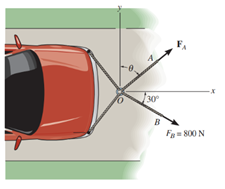

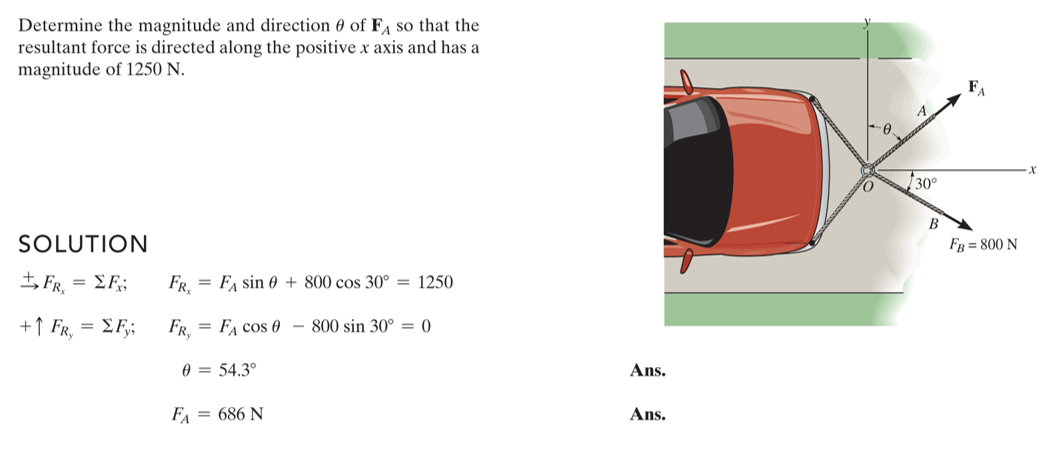

In [20]:
## Load in figures for reference
fbd4 = Image.open('FBD Problem #4.png')
display(fbd4)
problem4 = Image.open('Problem #4 Solutions.png')
display(problem4)

In [21]:
def solve_fa_theta(F_R=1250, F_B=800, theta_B=30):
    # Convert angles to radians
    theta_B_rad = np.radians(theta_B)
    # Solve for theta_A using sum of forces in y-direction
    theta_A_rad = np.arctan( (F_R / F_B - np.cos(theta_B_rad)) / np.sin(theta_B_rad) )
    # Solve for F_A using sum of forces in x-direction
    F_A = (F_R - F_B * np.cos(theta_B_rad)) / np.sin(theta_A_rad)
    # Convert theta_A from radians to degrees
    theta_A = np.degrees(theta_A_rad)
    return theta_A, F_A
 
# Print results of the function
theta_A, F_A = solve_fa_theta()
print(f"Theta_A: {theta_A:.1f} degrees")
print(f"F_A: {F_A:.1f} N")


Theta_A: 54.3 degrees
F_A: 685.9 N


## Bonus Problem: How to Integrate in Python
This problem is an extra example that shows you how to do integration in Python and is NOT required for Project #2

The load over the plate varies linearly along the sides of the plate such that p = (12 - 6x + 4y) kPa. Determine the magnitude of the resultant force and the coordinates (x, y) of the point where the line of action of the force intersects the plate.

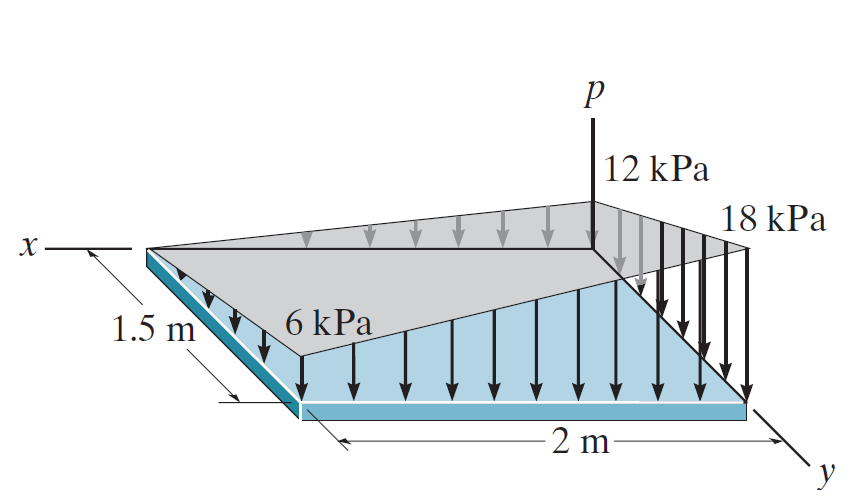

In [23]:
extraproblem = Image.open('extra problem.PNG')
display(extraproblem)

This problem focuses on how to use integration in Python. You **do not** need to setup a function implementation.

### Set Up Inputs

In [25]:
x = 1.5 * ureg.meters
y = 2.0 * ureg.meters
const = 12.0 * ureg.meters

In [26]:
from scipy.integrate import dblquad
import pint

# Define the unit registry
ureg = pint.UnitRegistry()

# Function with only `x` and `y` wrapped (since `const` does not have length units)
@ureg.wraps(ureg.kilonewton, (None, ureg.meters, ureg.meters))
def calc_F_R(const, x, y): 
    # Ensure inputs have correct units
    if not isinstance(const, pint.Quantity):
        raise ValueError("const must have units of force per area (e.g., kN/m²)")

    if not isinstance(x, pint.Quantity):
        x = x * ureg.meters
    if not isinstance(y, pint.Quantity):
        y = y * ureg.meters

    # Convert `const` to kN/m² for consistency
    const = const.to(ureg.kilonewton / ureg.meter**2)

    # Define function to be integrated
    f = lambda x, y: const.magnitude - 6 * x + 4 * y  

    # Perform double integration using magnitude values
    F_R = dblquad(f, 0, x.magnitude, 0, y.magnitude)[0]  
    
    return F_R * ureg.kilonewton  # Reapply kilonewton units after integration

# Define inputs with correct units
x = 1.5 * ureg.meters  # Upper limit for x
y = 2.0 * ureg.meters  # Upper limit for y
const = 12.0 * ureg.kilonewton / ureg.meter**2  # Corrected unit for const

# Compute the resultant force
F_R = calc_F_R(const, x, y)

# Print the result
print(f'The resultant force = {F_R:.2f}.')

The resultant force = 27.00 kilonewton.


In [27]:
# Import required packages
from scipy.integrate import dblquad
from pint import UnitRegistry

# Initialize unit registry
ureg = UnitRegistry()

# Define function for moment of inertia about the x-axis
@ureg.wraps(ureg.kilonewton * ureg.meters, (None, ureg.meters, ureg.meters))
def calc_Mx(const, x, y): 
    # Ensure inputs have correct units
    if not isinstance(const, ureg.Quantity):
        const = const * (ureg.kilonewton / ureg.meter**2)  

    if not isinstance(x, ureg.Quantity):
        x = x * ureg.meters  
    if not isinstance(y, ureg.Quantity):
        y = y * ureg.meters  

    const = const.to(ureg.kilonewton / ureg.meter**2).magnitude

    # Define function for integration (Moment of inertia about x-axis)
    f = lambda x, y: (const - 6*x + 4*y) * y  

    # Perform double integration
    Mx = dblquad(f, 0, x.magnitude, 0, y.magnitude)[0]
    
    return Mx * ureg.kilonewton * ureg.meters  

# Define function for moment of inertia about the y-axis
@ureg.wraps(ureg.kilonewton * ureg.meters, (None, ureg.meters, ureg.meters))
def calc_My(const, x, y): 
    if not isinstance(const, ureg.Quantity):
        const = const * (ureg.kilonewton / ureg.meter**2)  

    if not isinstance(x, ureg.Quantity):
        x = x * ureg.meters  
    if not isinstance(y, ureg.Quantity):
        y = y * ureg.meters  

    const = const.to(ureg.kilonewton / ureg.meter**2).magnitude

    # Define function for integration (Moment of inertia about y-axis)
    f = lambda x, y: (const - 6*x + 4*y) * x  

    # Perform double integration
    My = dblquad(f, 0, x.magnitude, 0, y.magnitude)[0]
    
    return My * ureg.kilonewton * ureg.meters  

# Define function to compute resultant force
@ureg.wraps(ureg.kilonewton, (None, ureg.meters, ureg.meters))
def calc_F_R(const, x, y): 
    if not isinstance(const, ureg.Quantity):
        const = const * (ureg.kilonewton / ureg.meter**2)  

    if not isinstance(x, ureg.Quantity):
        x = x * ureg.meters  
    if not isinstance(y, ureg.Quantity):
        y = y * ureg.meters  

    const = const.to(ureg.kilonewton / ureg.meter**2).magnitude

    # Define function for integration
    f = lambda x, y: const - 6*x + 4*y  

    # Perform double integration
    F_R = dblquad(f, 0, x.magnitude, 0, y.magnitude)[0]
    
    return F_R * ureg.kilonewton  

# Define variables with correct units
const = 10 * ureg.kilonewton / ureg.meter**2  
x = 2 * ureg.meters  
y = 3 * ureg.meters  

# Compute results
F_R = calc_F_R(const, x, y)
Mx = calc_Mx(const, x, y)
My = calc_My(const, x, y)

# Compute centroid coordinates (x̄, ȳ)
x_bar = My / F_R
y_bar = Mx / F_R

# Print results
print(f'The resultant force = {F_R:.2f}.')
print(f'Moment of inertia about x-axis (Mx) = {Mx:.2f}.')
print(f'Moment of inertia about y-axis (My) = {My:.2f}.')
print(f'Centroid coordinates: x̄ = {x_bar:.2f}, ȳ = {y_bar:.2f}')

The resultant force = 30.00 kilonewton.
Moment of inertia about x-axis (Mx) = 38.00 kilonewton * meter.
Moment of inertia about y-axis (My) = 18.00 kilonewton * meter.
Centroid coordinates: x̄ = 0.60 meter, ȳ = 1.27 meter
